In [1]:
import sys,os,json
import collections,math
import time,datetime,pytz
import numpy as np
import pandas as pd
import pickle
from scipy import interpolate, io
from scipy.io import loadmat
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap
import seaborn as sns
import operator
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

############################################
########## Plot Style Declaration ##########
# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
# plt.style.use('ggplot')
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'times new roman'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

##################################
########## End of Setup ##########

## Data loading code

In [5]:
path = 'data/emg/ninapro/'
full_path = path + 'db6/DB6_s'

# DB6_s10_a/S10_D1_T1.mat

In [ ]:
# def get_data_from_day(d):
data/emg/ninapro/db6/DB6_s1_a

In [7]:
print(full_path+str(subject+1)+"a/S"+str(subject+1) + "_D1_T1.mat")

data/emg/ninapro/db6/DB6_s1a/S1_D1_T1.mat


In [8]:
subject=0
data1t1 = io.loadmat(full_path+str(subject+1)+"_a/S"+str(subject+1) + "_D1_T1.mat")

In [12]:
data1t1

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 12 17:02:45 2017',
 '__version__': '1.0',
 'acc': array([[-0.028389  ,  1.0551395 , -0.48897794, ..., -0.3170625 ,
          0.3412325 ,  0.6554525 ],
        [-0.028389  ,  1.0554284 , -0.48928165, ..., -0.316764  ,
          0.34093398,  0.655154  ],
        [-0.028389  ,  1.0557172 , -0.48958534, ..., -0.31646547,
          0.34063548,  0.6548555 ],
        ...,
        [-0.1918884 ,  1.068428  , -0.10938246, ..., -0.3732578 ,
          0.016114  ,  0.66871   ],
        [-0.19128767,  1.0681318 , -0.10998987, ..., -0.37295926,
          0.016114  ,  0.66871   ],
        [-0.19068693,  1.0678355 , -0.11059728, ..., -0.37266076,
          0.016114  ,  0.66871   ]], dtype=float32),
 'daytesting': array([[1]], dtype=uint8),
 'emg': array([[ 2.2564998e-06,  4.5421616e-06,  5.2258429e-06, ...,
          5.1991361e-07,  3.5801313e-06,  2.8560025e-06],
        [ 2.9769669e-06,  4.5221350e-06,  6

In [17]:
Counter(data1t1['reobject'][:,0])

Counter({0: 363424,
         2: 79110,
         4: 151013,
         8: 70946,
         9: 79742,
         10: 75728,
         12: 78888,
         14: 77946,
         15: 74036,
         18: 70807,
         19: 81147,
         20: 74668,
         23: 72941,
         25: 78333})

In [16]:
Counter(data1t1['rerepetition'][:,0])

Counter({0: 2439,
         1: 122457,
         2: 114595,
         3: 123253,
         4: 114233,
         5: 123669,
         6: 112827,
         7: 122776,
         8: 115186,
         9: 122241,
         10: 117717,
         11: 121745,
         12: 115591})

In [27]:
Counter(data1t1['restimulus'][:,0])

Counter({0: 363424,
         1: 152304,
         3: 151829,
         4: 153674,
         6: 149140,
         9: 155815,
         10: 144982,
         11: 157561})

In [40]:
data1t1['restimulus'][:,0][500:700]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int8)

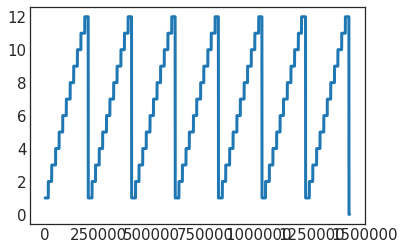

In [43]:
plt.plot(data1t1['rerepetition'][:,0])

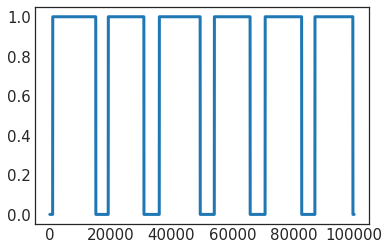

In [62]:
plt.plot(data1t1['restimulus'][:,0][:100000])

In [51]:
zero_l = []
for i, gest in enumerate(data1t1['restimulus'][:,0]):
    if gest == 0:
        zero_l.append(i)


In [54]:
zero_l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


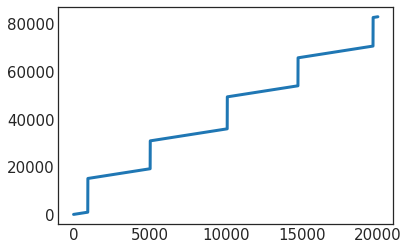

In [56]:
plt.plot(range(20000),zero_l[:20000])

In [58]:
363424/2000/4

45.428

In [46]:
Counter(data1t1['restimulus'][:,0])

Counter({0: 363424,
         1: 152304,
         3: 151829,
         4: 153674,
         6: 149140,
         9: 155815,
         10: 144982,
         11: 157561})

In [47]:
(data['restimulus'].shape[0] - Counter(data['restimulus'][:,0])[0])

1070410

In [23]:
data = data1t1
(data['restimulus'].shape[0] - Counter(data['restimulus'][:,0])[0])/10/100

1065.305

In [22]:
Counter(data1t1['restimulus'][:,0])[0]

363424

In [18]:
Counter(data1t1['daytesting'][:,0])

Counter({1: 1})

## COUNT THE NUMBER OF SAMPLES OF EACH SUBJECT

In [25]:
## COUNT THE NUMBER OF SAMPLES OF EACH SUBJECT
n_sample_l = []
for subject in range(10):
    for d in [1,2,3]: # data from day 1, 2, 3
        for t in [1, 2]:
            data = io.loadmat(full_path+str(subject+1)+"_a/S"+str(subject+1) + "_D" +str(d)+ "_T" + str(t)+".mat")
            n_sample_l.append((data['restimulus'].shape[0] - Counter(data['restimulus'][:,0])[0])/10/100)
    for d in [4,5]: # data from day 4, 5
        for t in [1, 2]:
            data = io.loadmat(full_path+str(subject+1)+"_b/S"+str(subject+1) + "_D" +str(d)+ "_T" + str(t)+".mat")
            n_sample_l.append((data['restimulus'].shape[0] - Counter(data['restimulus'][:,0])[0])/10/100)

In [26]:
print(n_sample_l)
for subject in range(10):
    print (n_sample_l[subject*10:(subject+1)*10])

[1065.305, 1076.435, 1066.685, 1061.202, 1035.618, 1033.0810000000001, 1037.143, 1047.287, 1053.259, 1069.451, 1013.855, 1038.4389999999999, 1085.43, 173.08, 1083.823, 1076.007, 1050.609, 1059.836, 1074.779, 1038.857, 1016.525, 1029.732, 1010.6030000000001, 1002.015, 1001.933, 999.66, 1021.118, 1011.7610000000001, 998.5210000000001, 1015.9010000000001, 1080.633, 1003.1489999999999, 956.316, 988.824, 1041.139, 1038.327, 1027.642, 998.2869999999999, 1000.7710000000001, 1002.8939999999999, 922.7460000000001, 953.084, 940.936, 879.424, 930.6010000000001, 975.154, 939.927, 954.4860000000001, 947.325, 930.6139999999999, 1027.873, 1043.971, 1051.484, 990.9110000000001, 1057.407, 1009.7080000000001, 1010.0830000000001, 1042.49, 1070.893, 1031.628, 1047.266, 1025.693, 1058.3139999999999, 1037.969, 1050.931, 1045.818, 1058.055, 1074.141, 1083.46, 1074.386, 888.018, 912.8480000000001, 963.796, 964.3989999999999, 1024.629, 1001.546, 999.324, 919.0889999999999, 984.0310000000001, 1007.748, 1036.664

## Resample the dataset from 2000Hz to 200Hz with total 14 features

In [4]:
def downSampleEmg(X,y,prev_freq,new_freq):
    X_new = []
    y_new = []
    curr_label = y[0]
    
    cnt = 0
    start_i = 0
    
    for i in range(len(y)):
        # when we encounter the new label different from the current label,
        # we initialize cnt and start_i, which is the same as
        # (1) drop the last few samples of the current label,
        # (2) start linear interpolation from the beginning of the new label.
        if y[i] != curr_label:
            curr_label = y[i]
            cnt = 1
            start_i = i
            continue
            
        if cnt % prev_freq == 0 and i != 0:
            # perform linear interpolation
            f = interpolate.interp1d(x=np.arange(prev_freq), y=X[start_i+cnt-prev_freq:start_i+cnt], axis=0)
            timeNew = np.linspace(0.0, prev_freq-1, new_freq)
            eleListNew = f(timeNew)

            # add interpolated data, eleListNew, to X_new
            X_new.extend(eleListNew)
            y_new.extend([curr_label]*new_freq)
        cnt+=1
    
    return X_new, y_new

In [82]:
## Resample the DB2 dataset from 2000Hz to 200Hz
# DB6_s10_a/S10_D1_T1.mat
path = 'data/emg/ninapro/db6/'
full_path = path + 'DB6_s'

prev_freq=2000
new_freq=200
for subject in range(10):
    for d in [1,2,3,4,5]: # data from day 1, 2, 3, 4, 5
        for t in [1, 2]:  # data from time 1, 2 (1: morning, 2: afternoon)
            # data loading
            if d in [1,2,3]:
                data = io.loadmat(full_path+str(subject+1)+"_a/S"+str(subject+1) + "_D" +str(d)+ "_T" + str(t)+".mat")
            else:
                data = io.loadmat(full_path+str(subject+1)+"_b/S"+str(subject+1) + "_D" +str(d)+ "_T" + str(t)+".mat")
            # remove the resting gesture, which is label=0
            target_idx = []
            for i in range(data['restimulus'].shape[0]):
                if data['restimulus'][i,0] != 0:
                    target_idx.append(i)
            X = data['emg'][target_idx,:]
            y = data['restimulus'][target_idx,0]
            # resample = downsample from prev_freq=2000hz to new_freq=200hz
            X_new, y_new = downSampleEmg(X=X, y=y, prev_freq=int(prev_freq/10), new_freq=int(new_freq/10))
            # normalize to zero mean and unit variance
            X_new = StandardScaler().fit_transform(X_new)
            # X_new Dim: [N x 16] with 2 empty columns which are [8,9] out of [0, 1, ..., 15]
            # Thus remove columns [8,9]
            saved_columns_l = [0,1,2,3,4,5,6,7,10,11,12,13,14,15]
            X_new = X_new[:,saved_columns_l]
            # save the preprocessed data
            print('subject {} y_new_Length {}  X_new describe below'.format(subject, len(y_new)))
            #print(X_tot_new.describe())
            print('store data as mat file... ')
            io.savemat(path+"processed_c7_f14/"+"S"+str(subject+1)+"_D"+str(d)+"_T"+str(t)+"_"+str(new_freq)+"Hz.mat", {
                'emg': X_new,
                'restimulus': y_new
                })

subject 0 y_new_Length 106460  X_new describe below
store data as mat file... 
subject 0 y_new_Length 107600  X_new describe below
store data as mat file... 
subject 0 y_new_Length 106580  X_new describe below
store data as mat file... 
subject 0 y_new_Length 106060  X_new describe below
store data as mat file... 
subject 0 y_new_Length 103500  X_new describe below
store data as mat file... 
subject 0 y_new_Length 103240  X_new describe below
store data as mat file... 
subject 0 y_new_Length 103640  X_new describe below
store data as mat file... 
subject 0 y_new_Length 104660  X_new describe below
store data as mat file... 
subject 0 y_new_Length 105240  X_new describe below
store data as mat file... 
subject 0 y_new_Length 106880  X_new describe below
store data as mat file... 
subject 1 y_new_Length 101300  X_new describe below
store data as mat file... 
subject 1 y_new_Length 103780  X_new describe below
store data as mat file... 
subject 1 y_new_Length 108480  X_new describe below


## Resample the dataset from 2000Hz to 200Hz with total 8 features

In [6]:
## Resample the DB2 dataset from 2000Hz to 200Hz
# DB6_s10_a/S10_D1_T1.mat
path = 'data/emg/ninapro/db6/'
full_path = path + 'DB6_s'

prev_freq=2000
new_freq=200
for subject in range(10):
    for d in [1,2,3,4,5]: # data from day 1, 2, 3, 4, 5
        for t in [1, 2]:  # data from time 1, 2 (1: morning, 2: afternoon)
            # data loading
            if d in [1,2,3]:
                data = io.loadmat(full_path+str(subject+1)+"_a/S"+str(subject+1) + "_D" +str(d)+ "_T" + str(t)+".mat")
            else:
                data = io.loadmat(full_path+str(subject+1)+"_b/S"+str(subject+1) + "_D" +str(d)+ "_T" + str(t)+".mat")
            # remove the resting gesture, which is label=0
            target_idx = []
            for i in range(data['restimulus'].shape[0]):
                if data['restimulus'][i,0] != 0:
                    target_idx.append(i)
            X = data['emg'][target_idx,:]
            y = data['restimulus'][target_idx,0]
            # resample = downsample from prev_freq=2000hz to new_freq=200hz
            X_new, y_new = downSampleEmg(X=X, y=y, prev_freq=int(prev_freq/10), new_freq=int(new_freq/10))
            # normalize to zero mean and unit variance
            X_new = StandardScaler().fit_transform(X_new)
            # X_new Dim: [N x 16] with 2 empty columns which are [8,9] out of [0, 1, ..., 15]
            # Thus remove columns [8,9]
            saved_columns_l = [0,1,2,3,4,5,6,7]
            X_new = X_new[:,saved_columns_l]
            # save the preprocessed data
            print('subject {} y_new_Length {}  X_new describe below'.format(subject, len(y_new)))
            #print(X_tot_new.describe())
            print('store data as mat file... ')
            io.savemat(path+"processed_c7_f8/"+"S"+str(subject+1)+"_D"+str(d)+"_T"+str(t)+"_"+str(new_freq)+"Hz.mat", {
                'emg': X_new,
                'restimulus': y_new
                })

subject 0 y_new_Length 106460  X_new describe below
store data as mat file... 
subject 0 y_new_Length 107600  X_new describe below
store data as mat file... 
subject 0 y_new_Length 106580  X_new describe below
store data as mat file... 
subject 0 y_new_Length 106060  X_new describe below
store data as mat file... 
subject 0 y_new_Length 103500  X_new describe below
store data as mat file... 
subject 0 y_new_Length 103240  X_new describe below
store data as mat file... 
subject 0 y_new_Length 103640  X_new describe below
store data as mat file... 
subject 0 y_new_Length 104660  X_new describe below
store data as mat file... 
subject 0 y_new_Length 105240  X_new describe below
store data as mat file... 
subject 0 y_new_Length 106880  X_new describe below
store data as mat file... 
subject 1 y_new_Length 101300  X_new describe below
store data as mat file... 
subject 1 y_new_Length 103780  X_new describe below
store data as mat file... 
subject 1 y_new_Length 108480  X_new describe below


## Test with the 200Hz data

In [2]:
## Test with the 200Hz data

path = 'data/emg/ninapro/db6/'
full_path = path + 'processed_2/'

data = io.loadmat(full_path + 'S10_D1_T1_200Hz.mat')

In [3]:
data = io.loadmat(full_path + 'S10_D1_T1_200Hz.mat')
df = pd.DataFrame(data['emg'])
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05,1.055800e+05
mean,-3.691350e-17,1.063324e-17,-1.779385e-16,-6.110748e-17,-7.402889e-18,-2.086269e-18,-4.515762e-17,-7.550947e-17,-6.184777e-17,-1.846684e-16,-1.876296e-16,-7.180802e-17,-3.289238e-18,2.086269e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.725864e+01,-1.829172e+01,-3.249503e+01,-2.379447e+01,-1.113441e+01,-2.342512e+01,-9.753514e+01,-2.416298e+01,-2.966654e+01,-1.970321e+01,-1.087636e+01,-1.452088e+02,-1.108038e+02,-1.959040e+01
25%,-4.157263e-01,-3.681937e-01,-2.892740e-01,-5.013082e-01,-6.093157e-01,-2.023029e-01,-1.849371e-01,-4.601987e-01,-3.300328e-01,-3.555814e-01,-4.489416e-01,-1.484024e-01,-1.711462e-01,-5.615793e-01
50%,3.781279e-02,3.987718e-02,1.042345e-02,-3.005390e-02,-1.142309e-02,1.907804e-02,3.564127e-02,1.938453e-03,9.260173e-03,1.631298e-02,3.983452e-03,-7.659676e-03,-2.630850e-02,6.030080e-02
75%,4.599487e-01,4.566770e-01,3.150682e-01,4.582973e-01,6.006935e-01,2.528298e-01,2.703334e-01,4.490673e-01,3.603799e-01,4.103537e-01,4.465813e-01,1.352416e-01,1.156652e-01,6.194459e-01
max,1.279930e+01,1.133035e+01,2.270666e+01,1.108199e+01,8.093552e+00,2.146083e+01,8.957071e+01,2.049779e+01,2.398368e+01,2.793325e+01,1.125066e+01,1.452892e+02,1.204215e+02,2.159924e+01


In [5]:
data = io.loadmat(full_path + 'S10_D3_T1_200Hz.mat')
df = pd.DataFrame(data['emg'])
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05,1.064800e+05
mean,1.668254e-17,2.402286e-18,-3.204382e-16,-3.690178e-17,-2.382267e-17,-5.655381e-18,-5.021444e-18,-3.002857e-17,-6.939937e-18,1.234508e-18,1.317921e-17,4.204000e-18,-1.734984e-17,1.988559e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.404290e+01,-1.334048e+01,-1.174588e+01,-1.054924e+01,-1.677065e+01,-1.440036e+02,-1.917293e+01,-1.368302e+01,-1.845429e+01,-2.026943e+01,-1.267813e+01,-1.723581e+01,-1.477289e+01,-1.116693e+01
25%,-3.924813e-01,-4.118713e-01,-4.154212e-01,-5.683665e-01,-5.493768e-01,-1.359533e-01,-1.624393e-01,-5.275305e-01,-2.796460e-01,-2.455269e-01,-4.129932e-01,-5.550290e-01,-4.168006e-01,-5.883826e-01
50%,2.250998e-02,5.429319e-02,3.583272e-02,-2.108125e-02,1.232575e-02,9.728111e-03,6.984371e-02,-2.317301e-02,2.277340e-02,1.151073e-02,-1.851560e-02,-2.529371e-02,-1.789189e-02,1.591269e-03
75%,3.955020e-01,4.881928e-01,4.710348e-01,5.313883e-01,5.721241e-01,1.489314e-01,3.392444e-01,4.639128e-01,3.580166e-01,2.802860e-01,3.693987e-01,5.131464e-01,3.734586e-01,5.864538e-01
max,1.400969e+01,7.675958e+00,1.261508e+01,9.565101e+00,8.663839e+00,1.066315e+02,8.792310e+00,2.697776e+01,1.849915e+01,1.466856e+01,1.589649e+01,1.903995e+01,2.031954e+01,1.742069e+01


In [74]:
data = io.loadmat(full_path + 'S5_D3_T1_200Hz.mat')
df = pd.DataFrame(data['emg'])
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,9.298000e+04,9.298000e+04,9.298000e+04,9.298000e+04,9.298000e+04,9.298000e+04,9.298000e+04,9.298000e+04,92980.0,92980.0,9.298000e+04,9.298000e+04,9.298000e+04,9.298000e+04,9.298000e+04,9.298000e+04
mean,6.495605e-18,-4.390265e-17,2.433941e-17,7.183375e-18,-2.445404e-18,1.339241e-17,-2.791200e-17,3.668106e-18,0.0,0.0,-1.581871e-17,-4.594685e-18,-3.030009e-17,1.528378e-18,1.146283e-18,-7.122240e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.0,0.0,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.494213e+01,-2.486564e+01,-1.328512e+01,-1.533339e+01,-4.280882e+01,-2.104448e+01,-1.278307e+01,-1.470877e+01,0.0,0.0,-1.534843e+01,-9.932300e+00,-1.100032e+01,-2.385203e+01,-1.972857e+01,-1.720509e+01
25%,-4.469419e-01,-3.192842e-01,-4.385297e-01,-5.149965e-01,-2.686197e-01,-2.259985e-01,-3.450417e-01,-3.407081e-01,0.0,0.0,-3.662745e-01,-4.192090e-01,-4.883215e-01,-4.057174e-01,-2.906164e-01,-5.540499e-01
50%,3.538285e-02,6.075512e-02,2.484335e-02,8.080852e-03,9.154038e-03,3.015616e-02,3.639349e-02,-3.521742e-02,0.0,0.0,4.175724e-02,5.661576e-03,-5.501041e-02,-2.559413e-02,-5.763535e-03,-5.632155e-02
75%,4.955036e-01,4.100509e-01,4.706489e-01,5.258615e-01,2.837200e-01,3.035878e-01,4.231319e-01,2.747316e-01,0.0,0.0,4.691899e-01,4.324501e-01,3.748086e-01,3.659867e-01,2.749115e-01,4.639645e-01
max,8.450168e+00,1.173889e+01,1.624726e+01,2.065011e+01,2.813583e+01,2.034640e+01,9.943067e+00,3.020208e+01,0.0,0.0,8.621937e+00,8.358558e+00,1.431741e+01,4.616628e+01,2.098128e+01,2.181461e+01


In [76]:
data['emg'][:,[0,1,2,3]]

array([[-0.16374726, -0.1969643 ,  0.46861491, -0.20667662],
       [ 0.02727136, -0.107209  ,  0.75707524,  0.29982425],
       [ 0.15959415, -0.84612097, -0.82911945, -0.33944586],
       ...,
       [ 0.09951953, -0.09050719, -0.16196565,  1.22871946],
       [ 0.03350997, -0.05317093,  0.12152499,  0.60318104],
       [ 0.01391707,  0.09044974, -0.38414303, -0.14702291]])

In [77]:
data['emg']

array([[-0.16374726, -0.1969643 ,  0.46861491, ...,  0.24914585,
        -0.10079247, -0.73983895],
       [ 0.02727136, -0.107209  ,  0.75707524, ...,  0.39960513,
        -0.52170007, -0.50947972],
       [ 0.15959415, -0.84612097, -0.82911945, ...,  0.55561154,
         0.16582826, -0.22589913],
       ...,
       [ 0.09951953, -0.09050719, -0.16196565, ..., -0.05965195,
         0.16729335,  1.31034031],
       [ 0.03350997, -0.05317093,  0.12152499, ..., -0.07841171,
        -0.0350569 ,  0.65923662],
       [ 0.01391707,  0.09044974, -0.38414303, ..., -0.42620791,
        -0.00894533,  0.72642581]])

In [78]:
aa = [[1,2],[1,2]]

In [80]:
aa[:,:

TypeError: list indices must be integers or slices, not list